# Bots in Science 🧪

In this notebook, we analyze the bot profile.

## Libraries

In [1]:
import pandas as pd

# 1. Bots metadata

In [4]:
データ_bots = pd.read_csv('results/bots_list.tsv', sep='\t',
                       dtype={'Outlet or Author':str},
                       encoding='UTF-8')
データ_bots.shape

(11073, 1)

In [5]:
データ_tweeters = pd.read_csv('data/tweeters_metadata.tsv', sep='\t', encoding='UTF-8', dtype={'id_str':str})
データ_tweeters = データ_tweeters.groupby('id_str').first().reset_index()
データ_tweeters.shape

(4875054, 20)

In [32]:
データ_scholars =  pd.read_csv('data/authors_tweeters_2022_08_21.csv', sep=',', encoding='UTF-8', dtype={'tweeter_id':str})
データ_scholars.shape

(498672, 4)

0         67446324
1         67446324
2         67453462
3         67462212
4         67490783
            ...   
498667    66543117
498668    66721406
498669    66765711
498670    67269116
498671    67277410
Name: tweeter_id, Length: 498672, dtype: object

# 2. Bots profile

In [35]:
データ_tweeters['is_bot'] = 'other'
データ_tweeters.loc[データ_tweeters['id_str'].isin(データ_scholars['tweeter_id'].tolist()), 'is_bot'] = 'scholar'
データ_tweeters.loc[データ_tweeters['id_str'].isin(データ_bots['Outlet or Author'].tolist()), 'is_bot'] = 'bot'
データ_tweeters['is_bot'].value_counts()

other      4495223
scholar     368758
bot          11073
Name: is_bot, dtype: int64

statuses_count    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

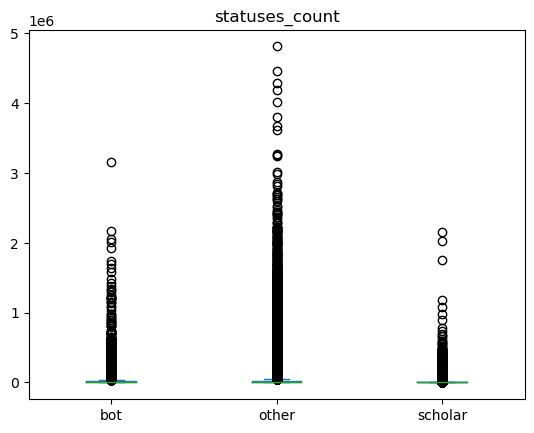

In [36]:
データ_tweeters[['statuses_count', 'is_bot']].plot.box(by='is_bot')

In [38]:
データ_tweeters_stats = データ_tweeters[['followers_count', 'friends_count', 'listed_count', 'favourites_count', 'statuses_count', 'is_bot']].groupby('is_bot').median().reset_index()
データ_tweeters_stats

,is_bot,followers_count,friends_count,listed_count,favourites_count,statuses_count
0,bot,154.0,118.0,2.0,4.0,1248.0
1,other,238.0,437.0,2.0,5065.0,4657.0
2,scholar,317.0,370.0,2.0,1054.0,427.0


In [24]:
データ_tweeters['followers_count_p'] = データ_tweeters['followers_count'].rank(pct=True)
データ_tweeters['friends_count_p'] = データ_tweeters['friends_count'].rank(pct=True)
データ_tweeters['favourites_count_p'] = データ_tweeters['favourites_count'].rank(pct=True)
データ_tweeters['statuses_count_p'] = データ_tweeters['statuses_count'].rank(pct=True)

In [26]:
データ_tweeters_stats = データ_tweeters[['followers_count_p', 'friends_count_p', 'favourites_count_p', 'statuses_count_p', 'is_bot']].groupby('is_bot').mean().reset_index()
データ_tweeters_stats

,is_bot,followers_count_p,friends_count_p,favourites_count_p,statuses_count_p
0,0,0.500147,0.500301,0.500942,0.500167
1,1,0.435339,0.367688,0.086403,0.426642
